In this file we will expolore our dataset from"Employers" of Drexel students answering the question "What are the student's strengths?"

In [1]:
#Importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

In [2]:
# Importing datasets
df=pd.read_csv('/Users/otabekjuraev/OneDrive - Sejong University/DREXEL/Courses/MIS/Week 3/dataset/employer_acad.csv') 
print("Employer => Weakness",df.shape)

Employer => Weakness (705, 10)


In [3]:
# So we have 728 rows and 10 columns in our dataset.

In [4]:
# Print first 10 rows of data

In [5]:
df

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,"What changes, if any, would you suggest for the academic preparation of this student?<br />"
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,I would not suggest any at this time.
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,Student needs a strong role model to help him ...
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,Training or a course on Corporate Communicatio...
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,None.
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,none
...,...,...,...,...,...,...,...,...,...,...
700,5918,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,None
701,5920,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,Drexel University should develop an orientatio...
702,5921,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,Nothing at this time.
703,5932,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,Could use a course in conflict resolution and ...


In [6]:
df.shape
df.isnull().sum()

Respondent ID                                                                                    0
Terms                                                                                            0
Class (BOT)                                                                                      0
College Code                                                                                     0
Major Code                                                                                       0
Conc                                                                                             0
Major Conc                                                                                     694
Co-op #                                                                                          0
Citizenship Status                                                                               0
What changes, if any, would you suggest for the academic preparation of this student?<br />    114
dtype: int

In [7]:
# We have 694 missing values in "Major Conc" column, since don't neet this data we delete it from our dataframe.
try:
    df.isnull().sum()
    df = df.drop("Major Conc", axis=1)
except:
    print("Completed")


# Delete rows with missing values

In [8]:
df = df.dropna(subset=["What changes, if any, would you suggest for the academic preparation of this student?<br />"])

In [9]:
# This how our target text data looks like. 708 rows of valid data left
df

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,"What changes, if any, would you suggest for the academic preparation of this student?<br />"
0,6,201435-201445,SR,B,ACCT,4COP,Only,US Citizen,I would not suggest any at this time.
1,11,201415-201425,JR,B,FIN,4COP,Only,US Citizen,Student needs a strong role model to help him ...
2,25,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Training or a course on Corporate Communicatio...
3,37,201435-201445,SR,B,LGST,5COP,Second,US Citizen,None.
4,44,201435-201445,SO,B,BAE,5COP,First,US Citizen,none
...,...,...,...,...,...,...,...,...,...
700,5918,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,None
701,5920,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Drexel University should develop an orientatio...
702,5921,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Nothing at this time.
703,5932,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Could use a course in conflict resolution and ...


In [10]:
#check for missiing values
df.isnull().sum()

Respondent ID                                                                                  0
Terms                                                                                          0
Class (BOT)                                                                                    0
College Code                                                                                   0
Major Code                                                                                     0
Conc                                                                                           0
Co-op #                                                                                        0
Citizenship Status                                                                             0
What changes, if any, would you suggest for the academic preparation of this student?<br />    0
dtype: int64

In [11]:
# No missing values in our dataset

# Working on removing contraction words

Before removing all punctuation we will convert contractions into whole words not to lose some information.

"Contractions are a unique type of word that combines two or more other words in a shortened form, 
usually with an apostrophe. Contractions take words that usually go together, 
like can not or I have, and then remove certain letters to shorten them and make other words, like can’t or I’ve." (Source: https://www.grammarly.com/blog/contractions/)

It is useful to keep those word in order to keep sentiment of the sentences.

In [12]:
import contractions

In [13]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))

In [14]:
contractions.contractions_dict.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

In [15]:
dt = contractions.contractions_dict
def update_text(text):
    for key in dt:
        text = re.sub(key, dt[key], text)
    return text

In [16]:
def expand_contractions(text,contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [17]:
df["processed"] = df["What changes, if any, would you suggest for the academic preparation of this student?<br />"].apply(lambda x: update_text(x))
df.sample(10)

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,"What changes, if any, would you suggest for the academic preparation of this student?<br />",processed
9,101,201415-201425,SR,B,MKTG,4COP,Only,US Citizen,Co-ops for analyst roles should have previous ...,Co-ops for analyst roles should have previous ...
52,642,201435-201445,JR,B,ACCT,5COP,Second,US Citizen,Student was well prepared for this particular ...,Student was well prepared for this particular ...
644,5423,201415-201425,PJ,B,MKTG,5COP,Second,US Citizen,I don't think that [Student] had taken too man...,I do not think that [Student] had taken too ma...
206,2113,201435-201445,JR,B,GBUS,5COP,Second,US Citizen,No suggestions,No suggestions
91,1031,201415-201425,SO,B,ACCT,5COP,First,US Citizen,None. Understands basic concepts and applies ...,None. Understands basic concepts and applies ...
234,2317,201435-201445,SR,B,FIN,4COP,Only,Non US Citizen,(none noted),(none noted)
374,3350,201435-201445,PJ,B,BAE,5COP,First,Resident Alien Non-Citizen,None,None
492,4102,201415-201425,PJ,B,MKTG,5COP,Second,US Citizen,Keep learning.,Keep learning.
115,1261,201435-201435,JR,B,INT1,5COP,Second,US Citizen,The student for this position needs to know al...,The student for this position needs to know al...
191,1991,201415-201425,SO,B,MKTG,5COP,First,US Citizen,Add more professionalism to her work-ethic. Wh...,Add more professionalism to her work-ethic. Wh...


# Lowercase the text

In [18]:
df['processed']=df["processed"].apply(lambda x: x.lower())

In [19]:
df["processed"]

0                  i would not suggest any at this time.
1      student needs a strong role model to help him ...
2      training or a course on corporate communicatio...
3                                                  none.
4                                                   none
                             ...                        
700                                                 none
701    drexel university should develop an orientatio...
702                                nothing at this time.
703    could use a course in conflict resolution and ...
704    more real life experience especially with spre...
Name: processed, Length: 591, dtype: object

# Remove all digits

In [20]:
df['processed']=df['processed'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))

# Removing punctuations

In [21]:
df['processed'] = df['processed'].apply(lambda i: re.sub('[%s]' % re.escape(string.punctuation), '', str(i)))

In [22]:
#Checking the results
df['processed'].sample(10)

415    quick books would be an asset for all students...
131                                                 none
454                                           no changes
401    better accesssupport to english language servi...
3                                                   none
379    it appears course work primarchly focuses on f...
610    financial modeling and increased proficiency i...
438    if student wants to work in marcheting he need...
418    student would benefit from more financial mode...
412                                                 none
Name: processed, dtype: object

# Removing extra spaces between words

In [23]:
df.loc['processed']=df['processed'].apply(lambda i: re.sub(' +',' ',i))

In [24]:
df["processed"].sample(10)

432    students basic knowledge on computing helps he...
614                                                 none
332    public speaking leadership or managthement wou...
5      he has to improve his strategical thinking and...
695                                                 none
476                                                 none
185                a little more writing grammarchskills
268    additional accounting classes with concentrati...
316    what impressed the most was that student had t...
590    none he was very intelligent of our analytics ...
Name: processed, dtype: object

# Removing Stop words

In [25]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [26]:
txt = df['processed'].values[0]
i =0
for token in list(nlp(txt)):
    print(i+1,":", token, token.is_stop, token.lemma_)
    i = i+1
#checking the results

1 : i True I
2 : would True would
3 : not True not
4 : suggest False suggest
5 : any True any
6 : at True at
7 : this True this
8 : time False time


#  Lemmitazation 
# Removing stop words  
# Correcting misspelled words

In [30]:
from textblob import TextBlob
def rem_stop_words_lemmatizing(txt):
    ans = []
    for token in nlp(txt):
        # Cheking and removing stop words
        if not token.is_stop:
            # This part lemmatizes words, checks misspelled words and corrects them
            ans.append(str(TextBlob(token.lemma_).correct()))
    return " ".join([word for word in ans])

In [32]:
# df['lemmatized']=df['processed'].apply(lambda i: ' '.join([token.lemma_ for token in list(nlp(i)) if (token.is_stop==False)]))
df['lemmatized'] = df['processed'].astype(str).apply(lambda x: rem_stop_words_lemmatizing(x))
df.sample(10)

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,"What changes, if any, would you suggest for the academic preparation of this student?<br />",processed,lemmatized
507,4281.0,201415-201425,JR,B,FIN,5COP,Third,US Citizen,None. Student's academic plan is what is neede...,none students acadthemic plan is what is neede...,student academic plan need prepare \r\n job like
676,5760.0,201415-201425,JR,B,ACCT,5COP,Third,US Citizen,None.,none,
34,372.0,201435-201445,JR,B,BAE,5COP,Second,US Citizen,Improvement in attendance needed.,improvthement in attendance needed,improvement attendance need
616,5151.0,201415-201425,SR,B,FIN,5COP,Third,US Citizen,None,none,
177,1857.0,201435-201445,JR,B,GBUS,5COP,First,US Citizen,None,none,
631,5290.0,201435-201445,SR,B,GBUS,5COP,Third,US Citizen,More data analysis and financial modeling.,more data analysis and financial modeling,date analysis financial modeling
272,2642.0,201435-201445,PJ,B,GBUS,5COP,First,US Citizen,More accounting specific courses.,more accounting specific courses,accounting specific course
89,1015.0,201435-201445,SR,B,GBUS,4COP,Only,US Citizen,"None, looks like [Student] is already in charg...",none looks like student is already in charge o...,look like student charge career short term future
399,3492.0,201415-201425,SR,B,MKTG,4COP,Only,Non US Citizen,None,none,
701,5920.0,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Drexel University should develop an orientatio...,drexel university should develop an orientatio...,repel university develop orientation packet em...


In [33]:
df.sample(10)

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,"What changes, if any, would you suggest for the academic preparation of this student?<br />",processed,lemmatized
66,816.0,201415-201425,PJ,B,ENTR,5COP,First,US Citizen,1. more field visits to construction sites,more field visits to construction sites,field visit construction site
279,2670.0,201415-201425,SO,B,MKTG,5COP,First,US Citizen,I would like to see more preparation in social...,i would like to see more preparation in social...,like preparation social medium well writing sk...
641,5378.0,201415-201425,PJ,B,BAE,5COP,Second,Non US Citizen,Fundermental of corporate finance and internat...,fundermental of corporate finance and internat...,fundamental corporate finance international bu...
150,1632.0,201435-201445,JR,B,MKTG,5COP,Second,US Citizen,[Student] would benefit from a public speaking...,student would benefit from a public speaking c...,student benefit public speak course think gr...
666,5619.0,201415-201425,SO,B,ENTR,5COP,Second,Non US Citizen,Perhaps more team-based programs to encourage ...,perhaps more teambased programs to encourage a...,teambase program encourage active work member ...
196,2013.0,201415-201425,FR,B,INT1,5COP,First,US Citizen,As a business major I would expect that studen...,as a business major i would expect that studen...,business major expect student understand busin...
68,843.0,201415-201425,JR,B,BAE,4COP,Only,Non US Citizen,technical skills,technical skills,technical skill
77,904.0,201415-201425,SO,B,LGST,5COP,First,US Citizen,focus more on legal studies,focus more on legal studies,focus legal study
99,1096.0,201415-201415,JR,B,ENTR,4COP,Only,US Citizen,No suggestions!,no suggestions,suggestion
554,4643.0,201415-201425,PJ,B,LGST,5COP,Second,US Citizen,None at this time.,none at this time,time


In [34]:
# Chercking results
print("Edited >>:", df.loc[478, "lemmatized"])
print("Unedited >>:", df.loc[478, "processed"])


Edited >>: suggest change student academic work show lot noise professionalism workplace writing implacable attitude positive
Unedited >>: i would not suggest any changes in students acadthemic work she showed a lot of poise and professionalism within the workplace her writing is impeccable and her attitude was always positive


# Vectorize preprocessed data

In [35]:
# Here we will create Words frequency matrix 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head(3)

,ability adapt,ability balance,ability clear,ability coursecredit,ability explain,ability gain,ability learn,ability problem,ability relay,ability speak,...,year college,year cook,year show,yes believe,yes difficult,yes lament,yes student,young man,young talent,young woman
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize data

## Word Cloud

In [36]:
from wordcloud import WordCloud
from textwrap import wrap

In [59]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

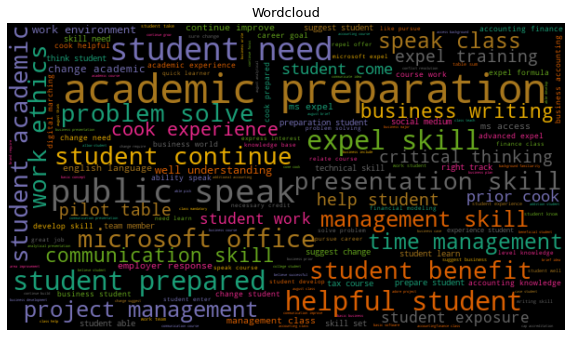

In [60]:
generate_wordcloud(data = df_dtm.sum(axis=0).to_dict(), title = "Wordcloud")

In [68]:
word_freqs = df_dtm.sum(axis=0).sort_values(ascending=False)[:15].to_dict()
word_freqs

{'academic preparation': 19,
 'public speak': 12,
 'student need': 11,
 'helpful student': 8,
 'expel skill': 8,
 'student prepared': 8,
 'problem solve': 7,
 'student continue': 7,
 'student benefit': 7,
 'microsoft office': 7,
 'work ethics': 7,
 'student academic': 7,
 'presentation skill': 7,
 'project management': 6,
 'speak class': 6}

In [69]:
try:
    word_freqs["excel skill"] = word_freqs.pop("expel skill")
except:
    dict(sorted(word_freqs.items()))

# Word frequency

In [70]:
type(word_freqs)

dict

In [56]:
import matplotlib.pyplot as plt

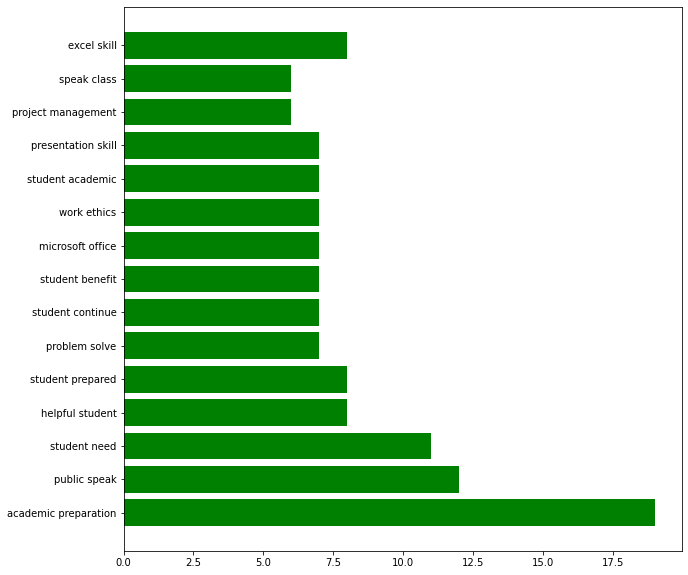

In [76]:
plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs)), word_freqs.values(),color='green')

plt.yticks(range(len(word_freqs)), word_freqs.keys())
plt.yticks(rotation = 0)
plt.show()